### Algoritam simuliranog kaljanja

Prvo cemo na jednom resenju pa potom ubacujemo u genetski

In [2]:
import codecs

def parse_dimacs_to_list(graph_file_name):
    
    graph_list = []
    dim = 0

    with codecs.open(graph_file_name, encoding='ascii') as graph_text:
    
        for line in graph_text:
            if line.startswith('e'):
                line = line[:-2]  
                line = line.split(' ')
                del line[0]    
                int_list = list(map(int,line))
                dim = max(dim, int(int_list[0]), int(int_list[1]))

        print('Dimenzija: ',dim)

        for i in range(0,dim+1):
            graph_list.append([])
        

    #popunjavanje liste
    with codecs.open(graph_file_name, encoding='ascii') as graph_text:        

        for line in graph_text:
            if line.startswith('e'):
                #print(line)
                line = line[:-2]  
                line = line.split(' ')
                del line[0]    
                int_list = list(map(int,line))
                #print(int_list)
                #print(int_list[0],int_list[1])
                graph_list[int_list[0]].append(int_list[1])
                graph_list[int_list[1]].append(int_list[0])
                #print(graph_list)


    return graph_list


In [3]:
def transpose(graph):
    for n, i in enumerate(graph):
        for m, j in enumerate(i):
            graph[n][m] = j - 1

In [4]:
graph0 = [[3],[3],[3],[0,1,2,4],[3,5,6,7],[4],[4],[4]]

#mali (4)
graph1 = parse_dimacs_to_list('graph1.txt')
graph1.pop(0) 
transpose(graph1)
#print(graph1)

#srednji (6)
graph2 = parse_dimacs_to_list('graph2.txt')
graph2.pop(0) 
transpose(graph2)
#print(graph2)

#srednje boja mnogo cvorova (20)
graph3 = parse_dimacs_to_list('graph3.txt')
graph3.pop(0) 
transpose(graph3)
#print(graph3)

#mnogo boja mnogo cvorova  (42)
graph4 = parse_dimacs_to_list('graph4.txt')
graph4.pop(0) 
transpose(graph4)
#print(graph4)

#mnogo covrova malo boja (8)
graph5 = parse_dimacs_to_list('graph5.txt')
graph5.pop(0) 
transpose(graph5)
#print(graph5)

#mnogo cvorova malo grana (9)
graph6 = parse_dimacs_to_list('graph6.txt')
graph6.pop(0) 
transpose(graph6)
#print(graph6)

Dimenzija:  11
Dimenzija:  47
Dimenzija:  128
Dimenzija:  128
Dimenzija:  95
Dimenzija:  120


In [5]:
import random
import time
from numpy import log as ln

def isFeasible(graph, solution):
    for i in range(len(graph)):
        for neigh in graph[i]:
            if(solution[i]==solution[neigh]):
                return False
            
    return True

def findAjdColors(i,graph,colors):
        ajdColors = []
        for ajd in graph[i]:
            ajdColors.append(colors[ajd])
        return ajdColors
        
        
def correctNonFeasible(graph,colors):
        
    for i in range(len(graph)):
        ajdColors = findAjdColors(i,graph,colors)
        if(colors[i] in ajdColors):  
            possibleColors = list(set(list(range(1,len(colors)+1)))-set(ajdColors))
            colors[i] = random.choice(possibleColors)
    


def initializeSolution(graph):
    colors = []
    numberOfColors = len(graph)
    for i in range(numberOfColors):
            colors.append(random.randrange(1,numberOfColors+1))
    
    if not isFeasible(graph,colors):
        correctNonFeasible(graph,colors)
        
    return colors

# racuna vrednost funkcije cilja
def solutionValue(solution):
    return sum(solution)
# biramo resenje iz okoline
# random odaberemo indeks i smanjimo mu vrednost boje
oldValue = 0

def adjacencySolution(solution,graph):
    global oldValue
    position = random.randrange(0,len(graph))
    oldValue = solution[position]
    oldPosition = position
   # if solution[position]==1:
    #    solution[position]=solution[position]+1
    #else:
     #   solution[position]=solution[position]-1
      
    newColor = random.randrange(1,len(graph)+1)
    solution[position] = newColor
    if isFeasible(graph,solution):
        return position
    solution[position] = oldValue
    return -1
            
    
# vracamo staru vrednost ako ne dobijamo bolje resenje

def restore(position,solution):
    solution[position] = oldValue



In [6]:
# Algoritam simuliranog kaljenja
def simulatedAnnealing(graph,solution,maxIters):
    currValue = solutionValue(solution)
    bestValue = currValue # na pocetku od pocetnog resenja 
    i=1
    # ponavljamo postupak dok ne dostignemo maksimalno iteracija
    while i<maxIters:
        # uzimamo resenje u okolini
        j = adjacencySolution(solution,graph)
        # ako nije dopustivo idemo na narednu iteraciju 
        if j<0: 
            continue
        newValue = solutionValue(solution)
        if newValue < currValue:
            currValue = newValue
        else:
            # Racunamo vrednost opadajuce fje
            # Uzimamo druge fje p
            
            p = 1.0 / i ** 0.5
           # p = ln(2) / ln(1+i) 
            q = random.uniform(0, 1) #treba nam random vr [0,1]
            if p > q:
                currValue = newValue
            else:
                restore(j, solution)
        if newValue < bestValue:
            bestValue = newValue
        i += 1
    return bestValue, solution

### Primena algoritma na grafove raznih dimenzija

Primenjen je algoritam na mali graf,srednji graf i veliki graf za razlicite iteracija

In [7]:
import matplotlib.pyplot as plt
import numpy as np

graph0
Sec: 0.0007397999999056992
Unique colors: 6
Sum : 17

graph1
Sec: 0.0009526000000050772
Unique colors: 7
Sum : 36

graph2
Sec: 0.00444120000008752
Unique colors: 28
Sum : 686

graph3
Sec: 0.039211899999941124
Unique colors: 77
Sum : 6434

graph4
Sec: 0.1035736999999699
Unique colors: 92
Sum : 6597

graph5
Sec: 0.012076200000024073
Unique colors: 57
Sum : 3702

graph6
Sec: 0.01854800000000978
Unique colors: 75
Sum : 5763

graph0
Sec: 0.006204000000025189
Unique colors: 4
Sum : 12

graph1
Sec: 0.008631400000012945
Unique colors: 6
Sum : 22

graph2
Sec: 0.04136489999996229
Unique colors: 19
Sum : 319

graph3
Sec: 0.3383770000000368
Unique colors: 48
Sum : 2525

graph4
Sec: 1.0068460999999616
Unique colors: 62
Sum : 3568

graph5
Sec: 0.12645610000004126
Unique colors: 42
Sum : 1526

graph6
Sec: 0.21399129999997513
Unique colors: 45
Sum : 2154

graph0
Sec: 0.06682219999993322
Unique colors: 3
Sum : 11

graph1
Sec: 0.0964733000000706
Unique colors: 4
Sum : 21

graph2
Sec: 0.4188034999

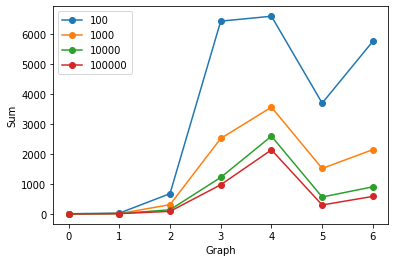

In [8]:
graph_names = ['graph0', 'graph1', 'graph2', 'graph3', 'graph4', 'graph5', 'graph6']
graph_list = [graph0, graph1, graph2, graph3, graph4, graph5, graph6]
unique_colors = []
#sums0, sums1, sums2, sums3, sums4, sums5, sums6 = [],[],[],[],[],[],[]
#sum_list = [sums0, sums1, sums2, sums3, sums4, sums5, sums6]
sum_list = []
compare_list = []

for size in [100,1000,10000,100000]:
    for graph, name in zip(graph_list, graph_names):

        start = time.perf_counter()
        solution = initializeSolution(graph)
        value, colors = simulatedAnnealing(graph,solution,size)
        end = time.perf_counter()
        unique_colors.append(len(set(colors)))
        timeExec = end - start
        sum_list.append(value)

        print(name)
        print('Sec: ' + str(timeExec))
        print('Unique colors: ' + str(len(set(colors))))
        print('Sum : ' + str(value))

        print()
    compare_list.append(unique_colors)
    unique_colors = []

    plt.plot([0,1,2,3,4,5,6], sum_list, '-o',label=size)
    plt.legend(loc='upper left')
    
    sum_list = []
plt.xlabel("Graph")
plt.ylabel("Sum")
plt.savefig('sa.png')
plt.show()

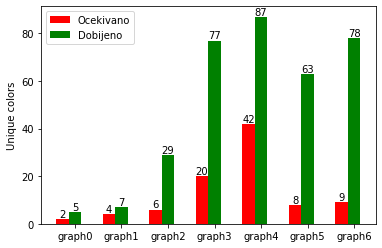

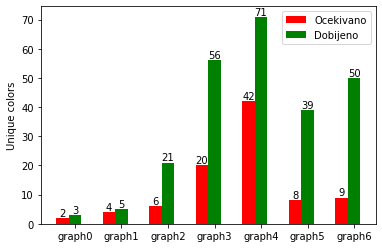

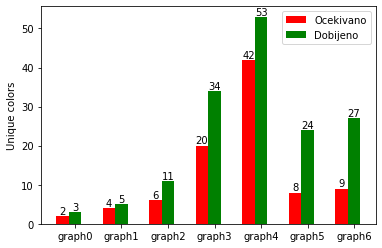

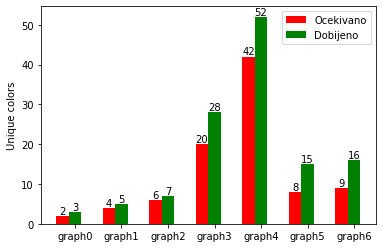

In [74]:
N = 7
ind = np.arange(N)
width = 0.27 



for colors in compare_list:
    fig = plt.figure()
    ax = fig.add_subplot()

    yvals = [2,4,6,20,42,8,9]
    rects1 = ax.bar(ind, yvals, width, color='r')
    zvals = colors
    rects2 = ax.bar(ind+width, zvals, width, color='g')

    ax.set_ylabel('Unique colors')
    ax.set_xticks(ind+width)
    ax.set_xticklabels( ('graph0', 'graph1', 'graph2', 'graph3', 'graph4', 'graph5', 'graph6') )
    ax.legend( (rects1[0], rects2[0]), ('Ocekivano', 'Dobijeno') )

    def autolabel(rects):
        for rect in rects:
            h = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1*h, '%d'%int(h),
                    ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    plt.show()


